## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [55]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
from scipy.stats import chi2_contingency
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline

### Link to my GitHub:
https://github.com/haydenchiu/Titanic_Dataset_Analysis

In [4]:
os.chdir(r'/Users/haydenchiu/Python Projects/CPSC4800/02 Assignments/Assignment_3 attached files Feb 20, 2023 645 PM/Titanic_Dataset_Analysis/Titanic_Dataset_Analysis/Data')
#read the titanic dataset
t_df = pd.read_csv('titanic.csv')

In [5]:
#get some basic info from the dataset
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


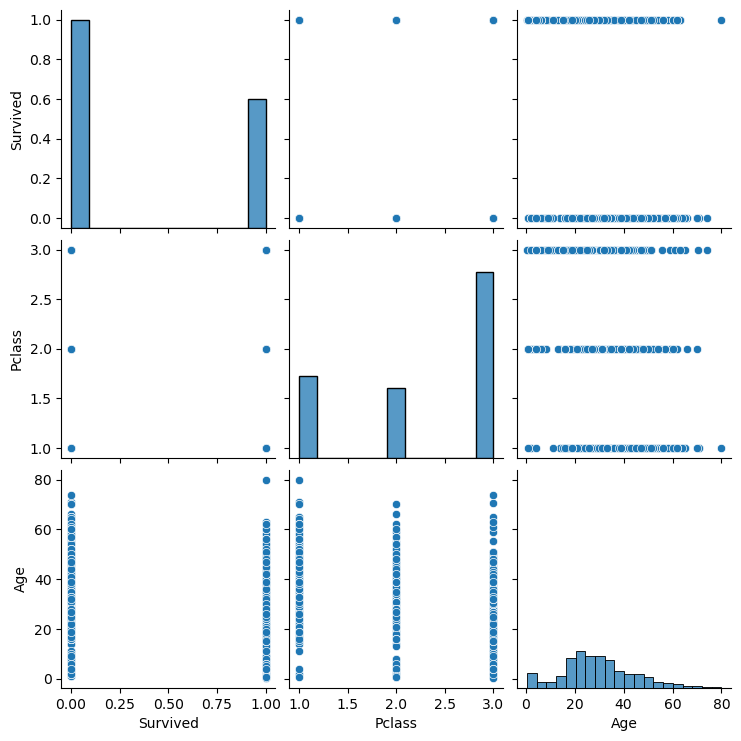

In [13]:
#Do a pairplot of all variables of interest
sns.pairplot(t_df[['Survived','Pclass','Sex','Age']],kind='scatter')

# 1. Determine if survival is associated to the class of passenger

In [26]:
#1. find out the types of variable of 'Survived' and 'Pclass'

print(t_df['Survived'].unique())
print(t_df['Pclass'].unique())

#'Survived' is a nominal categorical variable
#'Pclass' is a ordinal catgorical variable

[0 1]
[3 1 2]


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


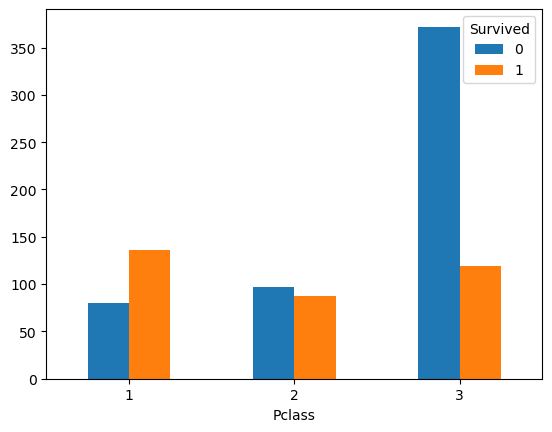

In [27]:
#Given the variables of interest are both categorical,
#We can use Chi-Square test to examin their association.

#But first, we could do a side by side bar chart as a prelimiary analysis.
#creating crosstab
cross = pd.crosstab(t_df['Pclass'],t_df['Survived'])

display(cross)

#side by side bar chart
bar_chart = cross.plot.bar(rot=0)

#by just eye-balling the bar chart, there are huge difference in the heights of bar across each Pclass,
#hence 'Survived' and 'Pclass' seems to be associated.
#We can move on to the Chi-Square test.

As the expected frequency count is greater than 5 among all cell on the cross table, the variables of interest are both categorical, and all observations are assumed to be independent,  
we can proceed to the chi-square test.

Let's define our hypothesis as below:

H0: Survived and Pclass are independent among all subjects in the population.  
Ha: Survived and Pclass are not independent among all subject in the population.  

In [28]:
#Chi-Square test between 'Survived' and 'Pclass'

chi_sq, p_value, dof, expect_f = chi2_contingency(cross)

print(f'Chi-Square Statistic: {chi_sq}\n')
print(f'P-Value: {p_value}\n')
print(f'Degrees of Freedom: {dof}\n')
print('Expected Frequencies:\n')
print(expect_f)

Chi-Square Statistic: 102.88898875696056

P-Value: 4.549251711298793e-23

Degrees of Freedom: 2

Expected Frequencies:

[[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


Since the p_value is less than 0.05,  
we will reject the null hypothesis and conclude that there are significate association between 'Survived' and 'Pclass'.

# 2. Determine if survival is associated to gender

In [29]:
#1. find out the types of variable of 'Survived' and 'Sex'

print(t_df['Survived'].unique())
print(t_df['Sex'].unique())

#'Survived' is a nominal categorical variable
#'Sex' is a nominal catgorical variable

[0 1]
['male' 'female']


Survived,0,1
Sex,,
female,81,233
male,468,109


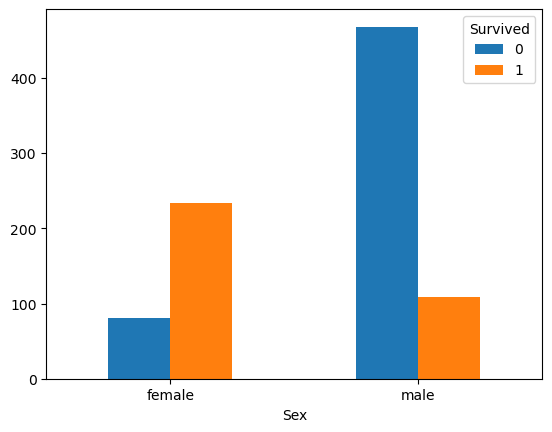

In [30]:
#Given the variables of interest are both categorical,
#We can use Chi-Square test to examin their association.

#But first, we could do a side by side bar chart as a prelimiary analysis.
#creating crosstab
cross = pd.crosstab(t_df['Sex'],t_df['Survived'])

display(cross)

#side by side bar chart
bar_chart = cross.plot.bar(rot=0)

#by just eye-balling the bar chart, there are huge difference in the heights of bar across each Gender,
#hence 'Survived' and 'Sex' seems to be associated.
#We can move on to the Chi-Square test.

As the expected frequency count is greater than 5 among all cell on the cross table, the variables of interest are both categorical, and all observations are assumed to be independent,  
we can proceed to the chi-square test.

Let's define our hypothesis as below:

H0: Survived and Sex are independent among all subjects in the population.  
Ha: Survived and Sex are not independent among all subject in the population.  

In [31]:
#Chi-Square test between 'Survived' and 'Pclass'

chi_sq, p_value, dof, expect_f = chi2_contingency(cross)

print(f'Chi-Square Statistic: {chi_sq}\n')
print(f'P-Value: {p_value}\n')
print(f'Degrees of Freedom: {dof}\n')
print('Expected Frequencies:\n')
print(expect_f)

Chi-Square Statistic: 260.71702016732104

P-Value: 1.1973570627755645e-58

Degrees of Freedom: 1

Expected Frequencies:

[[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


Since the p_value is less than 0.05,  
we will reject the null hypothesis and conclude that there are significate association between 'Survived' and 'Sex'.

# 3. Determine if survival is associated to age

In [33]:
#1. find out the types of variable of 'Survived' and 'Sex'

print(t_df['Survived'].unique())
print(t_df['Age'].unique())

#'Survived' is a nominal categorical variable
#'Age' is a numerical variable

#So we can transform 'Age' into 'Age_Group' in order to create a categorical variable.

[0 1]
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


In [53]:
#create age categories
bins = [0, 18, 35, 60, np.inf]
labels = ['0-18', '18-35', '35-60', '60+']
t_df['Age_Group'] = pd.cut(t_df['Age'], bins=bins, labels=labels, include_lowest=True)

As the expected frequency count is greater than 5 among all cell on the cross table, the variables of interest are both categorical, and all observations are assumed to be independent,  
we can proceed to the chi-square test.

Let's define our hypothesis as below:

H0: Survived and Age_Group are independent among all subjects in the population.  
Ha: Survived and Age_Group are not independent among all subject in the population.  

Age_Group,0-18,18-35,35-60,60+
Survived,,,,
0,69,221,117,17
1,70,137,78,5


Chi-Square Statistic: 9.239105767252916

P-Value: 0.026275104664500778

Degrees of Freedom: 3

Expected Frequencies:

[[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


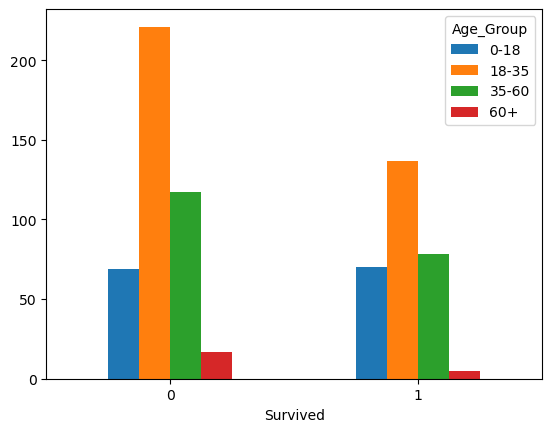

In [56]:
#Cross table of Survival and Age_Group
cross = pd.crosstab(t_df['Survived'], t_df['Age_Group'])

display(cross)

#side by side bar chart
bar_chart = cross.plot.bar(rot=0)
#even though the profile looks more similar this time, they are not identical.


# Perform chi-square test of independence
chi_sq, p_value, dof, expected_f = chi2_contingency(cross)

# Print the results
print(f'Chi-Square Statistic: {chi_sq}\n')
print(f'P-Value: {p_value}\n')
print(f'Degrees of Freedom: {dof}\n')
print('Expected Frequencies:\n')
print(expect_f)

Since the p_value is less than 0.05,  
we will reject the null hypothesis and conclude that there are significate association between 'Survived' and 'Age_Group'.